# Activity 3.2 Random Forest 

Objective(s):

This activity aims to perform classification  using Random Forest

Intended Learning Outcomes (ILOs):
* Demonstrate how to build the model using Random Forest.
* Demonstrate how to evaluate the performance of the model.


Resources:
* Jupyter Notebook
* loan_data

Procedure:

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data and check the content of the dataframe using Pandas

In [2]:
loans= pd.read_csv(r'C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 312\Logistic Regression, Decision Tree , Random Forest\data\Random Forest\loan_data.csv')
loans.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

Examine the data types. 

In [3]:
loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

Text(0.5, 0, 'FICO')

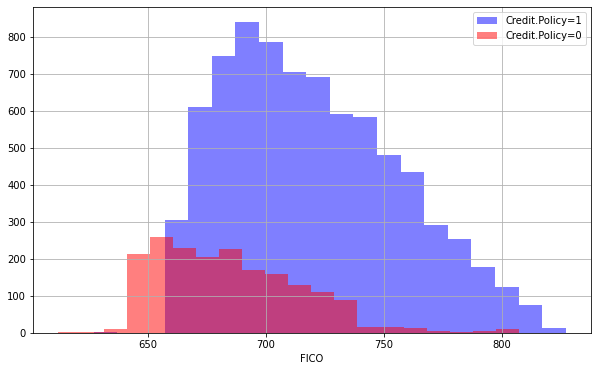

In [5]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=20,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=20,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Interpret the result of the graph

It seems that the distributions of FICO values in relation of Credit Policy are both right-skewed. There is a higher number of 1s under the credit policy column; there are more credit policies whose value is 1 than 0.

Create a similar figure, except this time select by the not.fully.paid column.

Text(0.5, 0, 'FICO')

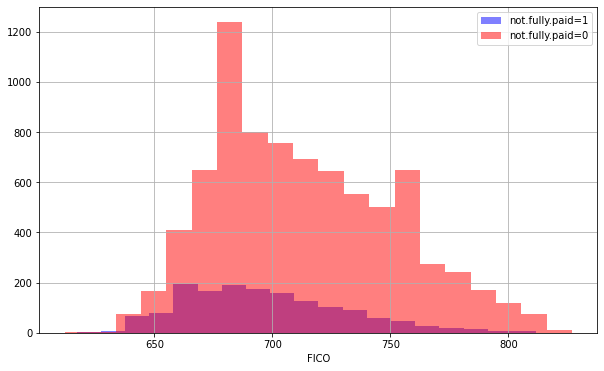

In [7]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=20,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=20,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Interpret the result of the graph

It's very clear that the distribution seems to also be right-skewed. There are also more (not fully paid =1) than (not fully paid = 0). 

Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. 

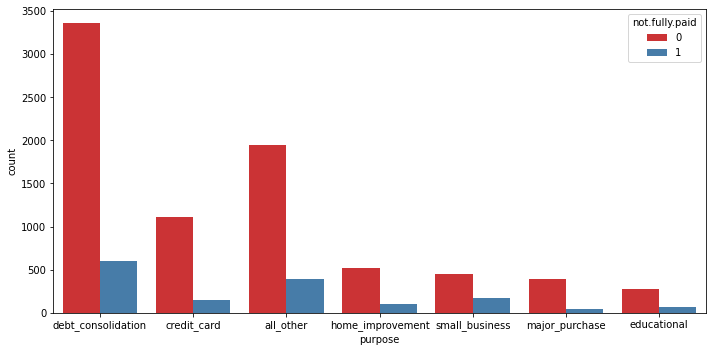

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1');
plt.tight_layout()

Most of the loas are not fully paid no matter the reason. But the reason for loaning that has the most number of unpaid loans is in debt_consolidation. The reason with the highest amount of paid loans is the sane column, debt_cosolidation. The least counts for both category of not fully paid is unde the reason of educational.

Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. 

<Figure size 792x504 with 0 Axes>

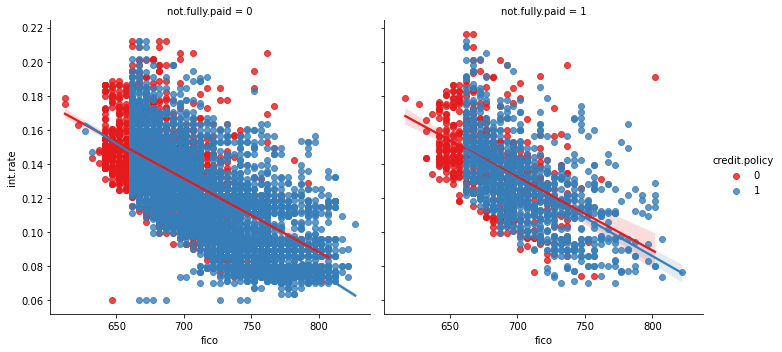

In [9]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

There is a negative correlation between fico and int.rate for class 1 and class 0 of 'not.fully.paid'. Credit.policy class of 0 seems to populate whrere fico is 650 and int.rate is from 0.12 to 0.19

This space/area is not populated by any datapoints with a credit.policy of 1. Which means mimimum fico for class 1 for credit.policy is a  little over 650, whereas minimum fico for class 0 is a little over 600.

The **purpose** column contains categorical value. Therefore, we need to transform the data using dummy variables. 
otice that the **purpose** column as categorical



In [15]:
cat_feats = ['purpose']

In [16]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [17]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

Split the data into a training set and a testing set

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Create an instance of the RandomForestClassifier class and fit it to our training data

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators=600)

In [22]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

What is n_estimators? 

    n_estimators is the number of trees in the forest. The more trees, the better the model. However, the slower the code executes.

Predict the class of not.fully.paid for the X_test data.

In [23]:
predictions = rfc.predict(X_test)

Create a classification report from the results

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_auc_score

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.59      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



Show the Confusion Matrix for the predictions.

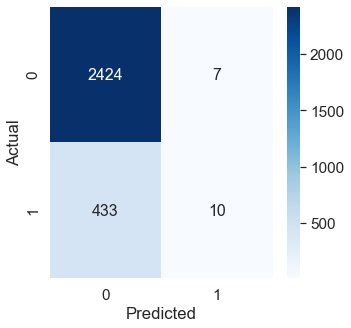

In [32]:
data = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(data, columns=np.unique(predictions), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", fmt = 'd', annot=True,annot_kws={"size": 16});

In [27]:
#evaluate the performance using accuracy score
print(accuracy_score(y_test, predictions))

0.8469032707028532


In [28]:
print(roc_auc_score(y_test, predictions))


0.5098469449817212


Interpret the result of the classification error, confusion matrix , accuracy score and roc_auc_score

`Classification Report`
* Model is better at predicting class 0 than class 1.
* Looking at precision, the model suggests that if 0 or 1 is predicted, model is correct 85% and 59% of the time, respectively
* Looking at the recall scores, the model also suggests that it was able to correctly predict all 2431 or almost 100% of the available instances of class 0 in the target column of the test dataset. However, the model was only able to correctly predict 2% of the class 1 instances. 

`Confusion Matrix`
* Our False Negaive is kind of high. It may or may not be ideal depending on the situation. You would be classifying someons as not fully paid when they are. So if you are using this to hound people who have not fully paid, you might find yourself dealing with angry fully-paid customers.
* Model is bad at predicting class 1.

`Accuracy Score`
* Accuracy score seems high but diving into the problem, we know that the high accuracy score is probably influenced by the high number of correctly predicted True Negatives. I would not use this score to describe the model's performance.

`ROC AUC Score`
* ideal is 1.0, since we are at 0.509 or half that, I'd say the model isn't performing well.



# Supplementary Activity:
* Choose your own dataset 
* Import the dataset 
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization 
* Build the model using Ranfom Forest
* Evaluate the model using classification report, accuracy , confusion matrix and roc_auc_score
* Change the n_estimators from 100 to 1000, increment by 100. 
* Create a graph to compare the accuracy based from n_estimators

# Random Forest Model

## Splitting the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 312\Logistic Regression, Decision Tree , Random Forest\data\Logistic Regression\weatherAUS.csv")

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.dropna(subset = ["RainTomorrow"],inplace=True)

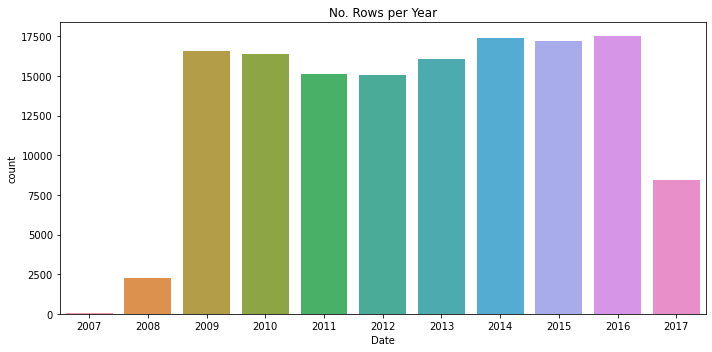

In [6]:
import seaborn as sns

plt.figure(figsize=(10,5))
plt.title('No. Rows per Year')
sns.countplot(x=pd.to_datetime(df["Date"]).dt.year)
plt.tight_layout();
plt.show()

In [7]:
year = pd.to_datetime(df["Date"]).dt.year
train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [8]:
print("shape of train_df is {}".format(train_df.shape))
print("shape of validity_df is {}".format(val_df.shape))
print("shape of test_df is {}".format(test_df.shape))

shape of train_df is (98988, 23)
shape of validity_df is (17231, 23)
shape of test_df is (25974, 23)


In [9]:
train_inputs = train_df.drop(['Date', 'RainTomorrow'], axis =1)
train_target = train_df["RainTomorrow"]

In [10]:
val_inputs = val_df.drop(['Date', 'RainTomorrow'], axis =1)
val_target = val_df["RainTomorrow"]
test_inputs = test_df.drop(['Date', 'RainTomorrow'], axis =1)
test_target = test_df["RainTomorrow"]

    collect all the columns that are numerical and categorical and put them into a list


In [11]:
num_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
cat_cols = train_inputs.select_dtypes(include=["object"]).columns.tolist()

In [12]:
train_inputs[num_cols].describe()

MinTemp      MaxTemp      Rainfall  Evaporation      Sunshine  \
count  98554.000000  98790.00000  97988.000000  61878.00000  58292.000000   
mean      12.002014     23.00288      2.372935      5.28686      7.602136   
std        6.345487      6.99008      8.518819      3.95104      3.788266   
min       -8.500000     -4.10000      0.000000      0.00000      0.000000   
25%        7.500000     17.80000      0.000000      2.60000      4.800000   
50%       11.800000     22.40000      0.000000      4.60000      8.400000   
75%       16.600000     27.90000      0.800000      7.20000     10.600000   
max       33.900000     48.10000    371.000000     82.40000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   92086.000000  97855.000000  97848.000000  97723.000000  97802.000000   
mean       40.230969     14.102192     18.770430     68.651822     51.501728   
std        13.713042      8.994121      8.877497     18.995535     20.742760   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  89643.000000  89679.000000  63224.000000  62222.000000  98205.000000   
mean    1017.518046   1015.138523      4.308048      4.414451     16.827340   
std        7.073083      6.997504      2.867317      2.694295      6.399855   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.500000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.300000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  98325.000000  
mean      21.525622  
std        6.832509  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.100000  
max       46.100000

In [13]:
train_inputs[cat_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## Imputing missing data


In [14]:
from sklearn.impute import SimpleImputer

#create an imputer object
imputer = SimpleImputer(strategy="mean")

In [15]:
# check the columns that have nan values and how many
train_inputs[num_cols].isnull().sum()

MinTemp            434
MaxTemp            198
Rainfall          1000
Evaporation      37110
Sunshine         40696
WindGustSpeed     6902
WindSpeed9am      1133
WindSpeed3pm      1140
Humidity9am       1265
Humidity3pm       1186
Pressure9am       9345
Pressure3pm       9309
Cloud9am         35764
Cloud3pm         36766
Temp9am            783
Temp3pm            663
dtype: int64

In [16]:
# fit the imputer model to fill each column with missing values the mean value for that column
imputer.fit(train_inputs[num_cols])

SimpleImputer()

In [17]:
# the object imputer now contains an atribute called .statistics_ which contains the mean value for each column. We can access this:
list(imputer.statistics_)

[12.002014124236458,
 23.002879846138278,
 2.37293546148508,
 5.286859627007984,
 7.602135799080491,
 40.2309688769194,
 14.102192018803331,
 18.770429645981523,
 68.6518219866357,
 51.50172798102288,
 1017.5180460270183,
 1015.1385228648849,
 4.308047576869543,
 4.414451480183858,
 16.82733974848531,
 21.525622171370454]

In [18]:
# we need to inject these values in the predictor variable for all our datasets.

train_inputs[num_cols] = imputer.fit_transform(train_inputs[num_cols])
val_inputs[num_cols] = imputer.fit_transform(val_inputs[num_cols])
test_inputs[num_cols] = imputer.fit_transform(test_inputs[num_cols])

## Normalizing our Numerical columns


In [19]:
from sklearn.preprocessing import MinMaxScaler

#create an object for MinMaxScaler
scaler = MinMaxScaler()

#scaler.transform({data fram with num cols}) will result in the scaling of the values from (0,1)

train_inputs[num_cols] = scaler.fit_transform(train_inputs[num_cols])
val_inputs[num_cols] = scaler.fit_transform(val_inputs[num_cols])
test_inputs[num_cols] = scaler.fit_transform(test_inputs[num_cols])

In [20]:
# verify that the scaling worked (val_inputs is used to see the max and min but train_inputs and test_inputs both have a max of 1 and min of 0)
val_inputs[num_cols].describe().loc[["min","max"]]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min      0.0      0.0       0.0          0.0       0.0            0.0   
max      1.0      1.0       1.0          1.0       1.0            1.0   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min           0.0           0.0          0.0          0.0          0.0   
max           1.0           1.0          1.0          1.0          1.0   

     Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
min          0.0       0.0       0.0      0.0      0.0  
max          1.0       1.0       1.0      1.0      1.0

## Encoding Categorical Data


In [21]:
# check all of our categorical columns
train_inputs[cat_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [22]:
train_inputs[cat_cols].isnull().sum()

Location          0
WindGustDir    6943
WindDir9am     7323
WindDir3pm     2030
RainToday      1000
dtype: int64

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
# encoder object
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')

### Try to impute missing categorical values by inputting "Unknown"


In [25]:
test_inputs.fillna("Unknown", inplace = True)
train_inputs.fillna("Unknown", inplace = True)
val_inputs.fillna("Unknown", inplace = True)

In [26]:
#check to see if imputation works (val_df2 is shown here but test_df2 and train_df2 also are modified)
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.516509  0.517241  0.001617     0.064161  0.531618   
1        Albury  0.375000  0.559387  0.000000     0.064161  0.531618   
2        Albury  0.504717  0.570881  0.000000     0.064161  0.531618   
3        Albury  0.417453  0.614943  0.000000     0.064161  0.531618   
4        Albury  0.613208  0.697318  0.002695     0.064161  0.531618   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.599057  0.714559  0.000000     0.064161  0.531618   
144549    Uluru  0.556604  0.783525  0.000000     0.064161  0.531618   
144550    Uluru  0.608491  0.802682  0.000000     0.064161  0.531618   
144551    Uluru  0.674528  0.816092  0.000000     0.064161  0.531618   
144552    Uluru  0.731132  0.837165  0.000000     0.064161  0.531618   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W       0.294574          W        WNW  ...      0.275862   
1              WNW       0.294574        NNW        WSW  ...      0.252874   
2              WSW       0.310078          W        WSW  ...      0.298851   
3               NE       0.139535         SE          E  ...      0.103448   
4                W       0.271318        ENE         NW  ...      0.229885   
...            ...            ...        ...        ...  ...           ...   
144548         SSE       0.286822        ESE        SSE  ...      0.298851   
144549          NE       0.193798        ENE         SW  ...      0.229885   
144550         ESE       0.255814        ESE        SSE  ...      0.103448   
144551         ESE       0.286822        ESE        SSW  ...      0.195402   
144552         WNW       0.542636        ENE        SSW  ...      0.149425   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              0.71         0.22     0.449587     0.463696  0.888889   
1              0.44         0.25     0.497521     0.475248  0.478672   
2              0.38         0.30     0.447934     0.490099  0.478672   
3              0.45         0.16     0.613223     0.557756  0.478672   
4              0.82         0.33     0.500826     0.445545  0.777778   
...             ...          ...          ...          ...       ...   
144548         0.22         0.13     0.555372     0.508251  0.478672   
144549         0.16         0.08     0.530579     0.471947  0.478672   
144550         0.15         0.08     0.519008     0.478548  0.478672   
144551         0.22         0.09     0.553719     0.498350  0.478672   
144552         0.16         0.09     0.522314     0.448845  0.478672   

        Cloud3pm   Temp9am   Temp3pm  RainToday  
0       0.490495  0.494577  0.525391         No  
1       0.490495  0.501085  0.574219         No  
2       0.222222  0.583514  0.552734         No  
3       0.490495  0.520607  0.617188         No  
4       0.888889  0.514100  0.679688         No  
...          ...       ...       ...        ...  
144548  0.490495  0.642082  0.720703         No  
144549  0.490495  0.754881  0.779297         No  
144550  0.490495  0.772234  0.796875         No  
144551  0.490495  0.774403  0.826172         No  
144552  0.490495  0.780911  0.830078         No  

[98988 rows x 21 columns]

In [27]:
# We must first fit our encoder object with our dataframe so it can recognize the categorical columns
encoder.fit(train_inputs[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [28]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

In [29]:
# generate columns names to label our new one-hot encoded columns
encoded_cols = list(encoder.get_feature_names(cat_cols))

print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [30]:
# Now that we have generated the one-hot encoded columns, we shall append them to our train, validation, and test datasets
train_inputs[encoded_cols] = encoder.fit_transform(train_df[cat_cols])
test_inputs[encoded_cols] = encoder.fit_transform(test_df[cat_cols])
val_inputs[encoded_cols] = encoder.fit_transform(val_df[cat_cols])

In [31]:
# Delete redundant columns such as the categori columns such as the ones we used the one-encoded on
train_inputs.drop(cat_cols, axis = 1, inplace = True)
test_inputs.drop(cat_cols, axis = 1, inplace = True)
val_inputs.drop(cat_cols, axis = 1, inplace = True)

In [32]:
#same outputs for the train and validation datasets.
test_inputs.columns.tolist()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',

In [33]:
print("train_inputs shape is {}".format(train_inputs.shape))
print("train_target shape is {}".format(train_target.shape))
print("val_inputs shape is {}".format(val_inputs.shape))
print("val_target shape is {}".format(val_target.shape))
print("test_inputs shape is {}".format(test_inputs.shape))
print("test_target shape is {}".format(test_target.shape))

train_inputs shape is (98988, 119)
train_target shape is (98988,)
val_inputs shape is (17231, 119)
val_target shape is (17231,)
test_inputs shape is (25974, 119)
test_target shape is (25974,)


## Training Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestClassifier

RandomForestModel = RandomForestClassifier(n_jobs = -1, random_state = 22)
RandomForestModel.fit(train_inputs, train_target)

RandomForestClassifier(n_jobs=-1, random_state=22)

## Classification Metrics prior to Hypertuning

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [194]:
def pre_recall_curve(clf, input, target):
    '''
        target: target column
        input: input columns
        clf: classifier

    #? Function Outputs a precision(y-axis) vs recall/senstivity(x-axis) graph. It also shows the F1 score as well as the area under the curve (AUC) score which summarizes the performance of the model.
    #! Currently configure to work for binary target columns/data
    #! Best metric for imbalanced datasets
    #* compare the AUC scores for pre_recall_curve VS. roc_curve and notice if there is difference.
    #* Key feature is that True Negatives (or the class that is the majority) are not taken into consideration. It is only concerned with the prediction of the minority class.
    #* This helps interpret the performance of models with imbalanced datasets because the difference between the two curves is between Precision (TP/(TP+FN)) and 1-Specificity/FPR (1-(TN/(TN+FP)))
    
        Given: TN = 1310; TP = 90; FP = 116
        FPR/1-Specificity/X-axis/ROC_curve = 0.08 (ideal, should be close to 0)
        Precision/Y-axis/Precision_Recall_curve = 0.43 (not ideal, should be close to 1)
        
    #! Looking at the ROC curve we might be misled that the score of 0.08 is ideal when in fact this is not ideal at all since the formula to get this utilized the majority class, and therefore a big numerator value. This will cause the evaluator to neglect the TP values and FP values (which we want to increase and decrease, respectively), thus not allowing our model to be modified to better predict the positive class. You will end up with a class that is not good with predicting 1s.
    #! We neglected to evaluate the difference between ROC-curve's sensitivity and pr_recall_curve's recall since they are the same formula and produce the same values. 
    '''
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import f1_score
    from matplotlib import pyplot

    lr_precision, lr_recall, _ = precision_recall_curve(target, clf.predict_proba(input)[:,1], pos_label = target.value_counts().sort_values(ascending=False).index[-1])

    lr_f1, lr_auc = f1_score(target, clf.predict(input), pos_label = target.value_counts().sort_values(ascending=False).index[-1]), auc(lr_recall, lr_precision)
    # summarize scores
    print('KNN: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    no_skill = len(target[target== target.value_counts().sort_values(ascending=False).index[-1]]) / len(target)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill/baseline: {0:.2f}'.format(no_skill))
    pyplot.plot(lr_recall, lr_precision, marker='.', label='KNN')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    pyplot.plot(1.,1., marker='.')
    pyplot.annotate(xy=[1.,1.],xytext=[0.8,1.05], text="optimal point (1,1)", size = 10)
    # show the plot
    pyplot.tight_layout()
    pyplot.show()

def accuracyscores(clf, prior_inputs, prior_target, new_inputs , new_target):
    print("train model score {}".format(clf.score(prior_inputs, prior_target)))
    print("non-train model score {}".format(clf.score(new_inputs, new_target)))

    y_majority = np.full(new_target.shape[0], new_target.value_counts().sort_values(ascending=False).index[0])
    y_random = np.random.choice(val_target.value_counts().sort_values(ascending=False).index.tolist(), new_target.shape[0])

    print("random model accuracy score {}".format(accuracy_score(new_target, y_random)))
    print("majority model accuracy score {}".format(accuracy_score(new_target, y_majority)))

def confusionmatrixplot(clf,inputs, target):
    prediction = clf.predict(inputs)
    
    data = confusion_matrix(target, prediction)
    df_cm = pd.DataFrame(data, columns=np.unique(prediction), index = np.unique(target))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (5,5))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, cmap="Blues", fmt= 'd',annot=True,annot_kws={"size": 16});

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    try: 
        y_score = clf.decision_function(X_test)
        print("Using decision_function method")
    except: 
        y_score = clf.predict_proba(X_test)
        print("Using predict_proba method")
        
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for RandomForest_roc_auc_cruve')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.tight_layout()
    plt.show();

In [195]:
accuracyscores(RandomForestModel, train_inputs, train_target, val_inputs, val_target)

train model score 0.9999696932961571
non-train model score 0.8549126574197667
random model accuracy score 0.49834600429458537
majority model accuracy score 0.7882885497069235


    notice how the model works really well with the data is was trained on but not on new data. This is a clear case of overfitting.

    We can benchmark our model against baseline models wherein the predicted values are either random (y_random) or contains the majority target class (y_majority). Checking their accuracies and comparing our model's own accuracy against these dumb models can give as a pretty good idea whether our model is worthwhile and better. Fortunately, our model outperformed both the dumb models using the accuracy metric.

In [38]:
feature_importance_df = pd.DataFrame(
    {
        'feature': train_inputs.columns.tolist(),
        'importance': RandomForestModel.feature_importances_
    }
).sort_values(by ='importance', ascending = False)

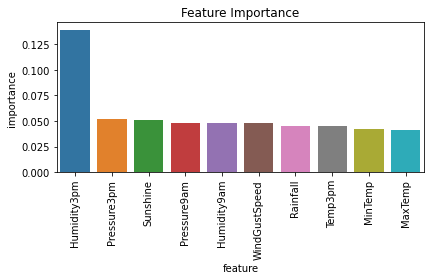

In [39]:
plt.title('Feature Importance')
sns.barplot(data = feature_importance_df.head(10), x='feature', y='importance')
plt.xticks(rotation = 90)
plt.tight_layout()

     It seems the model gives most importance to the column Humidity3pm that is more than twice the amount than the next important feature column

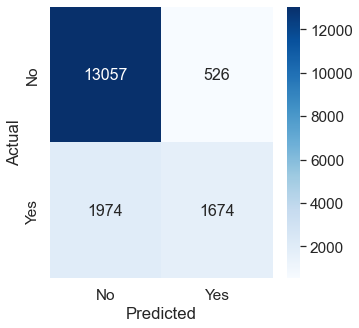

In [40]:
confusionmatrixplot(RandomForestModel, val_inputs, val_target)

    Around 54% of our Ground Truth for the class of Yes was predicted incorrectly. And this was brought upon when our model is predicting "No", instead of when the model was predicting "Yes". Our False Negatives comprise about 13% of our total number of prediction of "No"s. So we can trust our model to correctly predict a chance of no rain 86% of the time when it predicts "No". We can also trust our model to predict rain 76% of the time when it predicts "Yes".

In [41]:
print(classification_report(val_target, RandomForestModel.predict(val_inputs)))

              precision    recall  f1-score   support

          No       0.87      0.96      0.91     13583
         Yes       0.76      0.46      0.57      3648

    accuracy                           0.85     17231
   macro avg       0.81      0.71      0.74     17231
weighted avg       0.85      0.85      0.84     17231



    The precision for both the No and Yes class are as I described in the confusion matric explanation. However, despite this our recall score for the class "Yes" is very low compared to its precision. One factor that causes this is the fact that our dataset is imbalanced. With our target column having a majority of No values, that has caused our precision and recall for No to be higher than Yes.

In [42]:
roc_auc_score(val_target, RandomForestModel.predict_proba(val_inputs)[:,1])

0.8717470040433668

Using predict_proba method


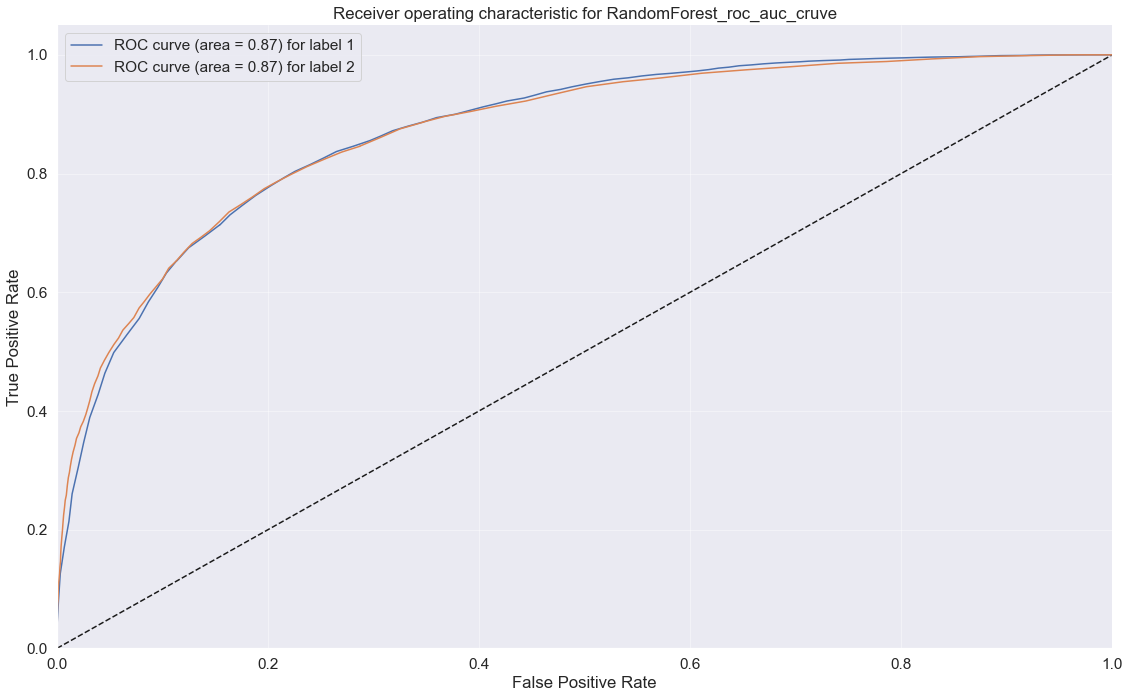

In [43]:
plot_multiclass_roc(RandomForestModel, val_inputs, val_target, 2, figsize=(16,10))

    ideal is 1.0, since we are at 0.87 for both classes, the model is performing well. Notice that the ROC curve and score for both of the classes are the similar (model isn't better at predicting No vs. Yes) despite having different recall and precision scores. For imbalanced datasets (like what we have) it's better to look at the ROC curve and AUC values for determining the models' performace since recall and precision scores are heavily affected by imbalanced datasets. 

## Hypertuning our Random Forest model

In [102]:
randomforest_random_grid = {'n_estimators': [100,200,300,400],
                          'max_depth': [4,7,10,15],
                          'min_samples_leaf': [1, 2, 4],
                          'criterion':['gini', 'entropy'],
                          }

In [103]:
from sklearn.model_selection import GridSearchCV

In [105]:
optimized_randomforest = GridSearchCV(RandomForestClassifier(n_jobs=-1,random_state=22), randomforest_random_grid, cv=2, verbose=True, n_jobs=-1)

In [106]:
best_randomforest = optimized_randomforest.fit(train_inputs, train_target)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


In [107]:
best_randomforest.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'n_estimators': 300,
 'n_jobs': -1}

In [55]:
RandomForestModel_optimized = RandomForestClassifier(criterion= 'entropy',
 max_depth= 15,
 min_samples_leaf= 2,
 n_estimators= 300,
 n_jobs=-1,
 random_state= 18)
RandomForestModel_optimized.fit(train_inputs, train_target)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       n_estimators=300, n_jobs=-1, random_state=18)

In [56]:
y_predictions_randomforest_optimized = RandomForestModel_optimized.predict(val_inputs)

## Classification Metrics on Optimized Random Forest Model

In [64]:
accuracyscores(RandomForestModel_optimized, train_inputs, train_target, val_inputs, val_target)

train model score 0.8842384935547744
non-train model score 0.8516046660089374
random model accuracy score 0.5065289304161105
majority model accuracy score 0.7882885497069235


In [65]:
accuracyscores(RandomForestModel, train_inputs, train_target, val_inputs, val_target)

train model score 0.9999696932961571
non-train model score 0.8549126574197667
random model accuracy score 0.49747548023910393
majority model accuracy score 0.7882885497069235


In [60]:
feature_importance_optimzed = pd.DataFrame(
    {
        'feature': train_inputs.columns.tolist(),
        'importance': RandomForestModel_optimized.feature_importances_
    }
).sort_values(by ='importance', ascending = False)

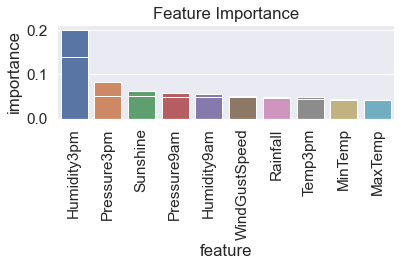

In [71]:
plt.title('Feature Importance')
sns.barplot(data = feature_importance_optimzed.head(10), x='feature', y='importance')
sns.barplot(data = feature_importance_df.head(10), x='feature', y='importance')
plt.xticks(rotation = 90)
plt.tight_layout()

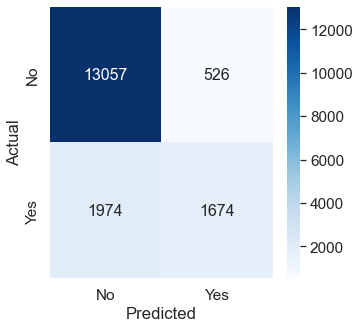

In [72]:
confusionmatrixplot(RandomForestModel, val_inputs, val_target)

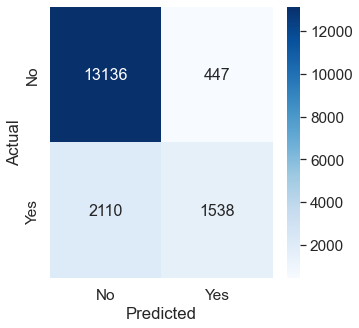

In [73]:
confusionmatrixplot(RandomForestModel_optimized, val_inputs, val_target)

In [75]:
print(classification_report(val_target, RandomForestModel.predict(val_inputs)))

              precision    recall  f1-score   support

          No       0.87      0.96      0.91     13583
         Yes       0.76      0.46      0.57      3648

    accuracy                           0.85     17231
   macro avg       0.81      0.71      0.74     17231
weighted avg       0.85      0.85      0.84     17231



In [74]:
print(classification_report(val_target, RandomForestModel_optimized.predict(val_inputs)))

              precision    recall  f1-score   support

          No       0.86      0.97      0.91     13583
         Yes       0.77      0.42      0.55      3648

    accuracy                           0.85     17231
   macro avg       0.82      0.69      0.73     17231
weighted avg       0.84      0.85      0.83     17231



In [76]:
roc_auc_score(val_target, RandomForestModel.predict_proba(val_inputs)[:,1])

0.8717470040433668

In [77]:
roc_auc_score(val_target, RandomForestModel_optimized.predict_proba(val_inputs)[:,1])

0.8711596773120682

Using predict_proba method


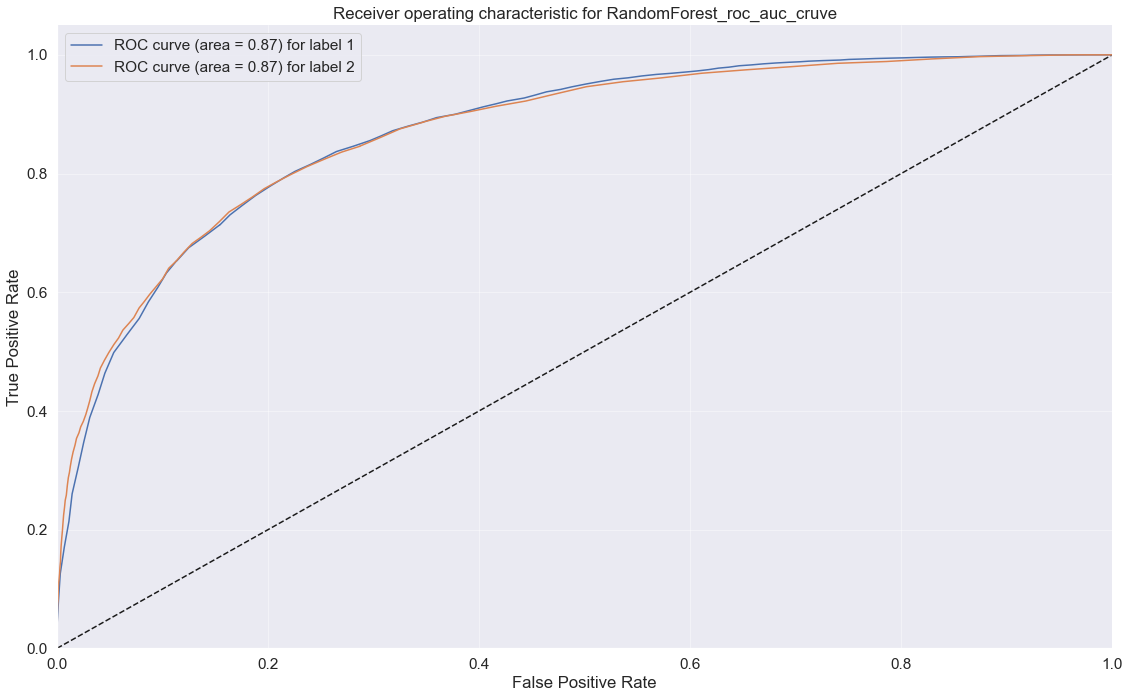

In [ ]:
plot_multiclass_roc(RandomForestModel, val_inputs, val_target, 2, figsize=(16,10))

Using predict_proba method


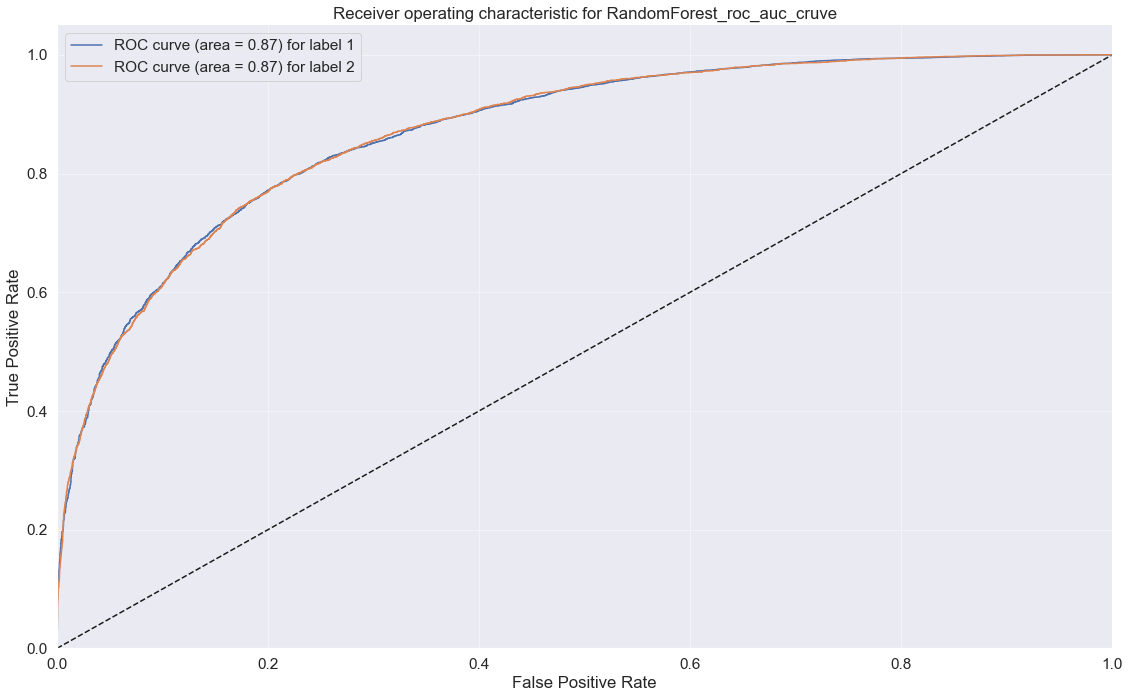

In [78]:
plot_multiclass_roc(RandomForestModel_optimized, val_inputs, val_target, 2, figsize=(16,10))

`Feature Importance`
* In the base model the top 1-5 and 8 had an increase in feature importance compared to the optimized model. I have not checked the other column features, but it is likely they have also expereinced a similar pattern.

`Classification Report`
* Optimized model is better at predicting class 0 than class 1.
* Looking at precision, the optimized model suggests that if 0 or 1 is predicted, model is correct 86% and 77% of the time, respectively. This is a decrease of 1% and an increase of 1%, respectively. Precision would not be the best metric to base our choice of model in this case.
* Looking at the recall scores, the optimized model also suggests that it was able to correctly predict all 2431 or almost 97% of the available instances of class 0 in the target column of the test dataset. However, the optimized model was only able to correctly predict 42% of the class 1 instances. There was a 4% decrese in the recall of the optimized model for class 1 and a 1% increase in the recall of the optimized model for class 0. Based on this, as well as the F1-score, the base model is clearly better.

`Confusion Matrix`
* Compared to the base model, the confusion matrix for the optimized model shows that the number of True Negatives increased; the number of False Positives decreased; the number of True Positives decreased; and the number of False Positives increased. 
* There are two types of errors: False Negatives and False Positives. Some insights we can gather is that our optimized model might not be so great to use. The model has a lot of False Negatives which is arguable worse than False Positives since adjusting for a fair weather is easier than adjusting for a rainy one. Our False Negatives increased by 6%. 

`Accuracy Score`
* Inerestingly, the optimized model did not do as well as the base random forest model we had previously in terms of accuracy score for the training dataset. There was an almost 11% drop in accuracy rate for the training score. As for the validation score, the optimized model produced a lower accuracy score compared to the base model. Both models, fortunately, perfromed bettern than our "dumb" models. We should look further into other metrics before we decide that the optimized model is not favourable.

`ROC AUC Score`
* The Curve essentially tells us about the changes in our classification error. As the Sensitivity (True Positive Rate) goes up, there are less False Negative errors; as the number of False Positve Rate (1-Specificity) decreases, there are less False Positive errors. The ideal threshold sees higher Y-values and lower X-Values.
* Since we established that having lower False Negatives is more important than having lower False Positives, we can choose a threshold that favors the Specificity.
* Since they have similar looking ROC curves, let is us looka their AUC scores. The ideal is 1.0, since we are at 0.87 for both base and optimized models, I'd say they are a tie here.

The better model would probably be the base model.

# Test Dataset Metric Scores

In [193]:
print(accuracyscores(RandomForestModel_optimized, train_inputs, train_target, test_inputs, test_target))

train model score 0.8842384935547744
non-train model score 0.8379533379533379
random model accuracy score 0.494994994994995
majority model accuracy score 0.7710787710787711
None


In [84]:
accuracyscores(RandomForestModel, train_inputs, train_target, test_inputs, test_target)

train model score 0.9999696932961571
non-train model score 0.8408023408023408
random model accuracy score 0.4933009933009933
majority model accuracy score 0.7710787710787711


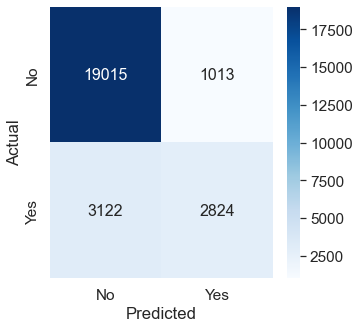

In [85]:
confusionmatrixplot(RandomForestModel, test_inputs, test_target)

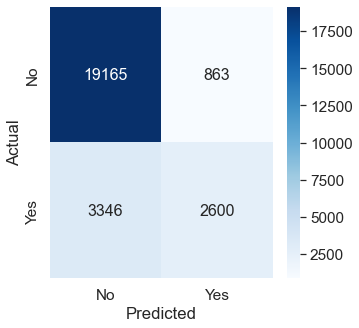

In [86]:
confusionmatrixplot(RandomForestModel_optimized, test_inputs, test_target)

In [87]:
print(classification_report(test_target, RandomForestModel.predict(test_inputs)))

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     20028
         Yes       0.74      0.47      0.58      5946

    accuracy                           0.84     25974
   macro avg       0.80      0.71      0.74     25974
weighted avg       0.83      0.84      0.83     25974



In [88]:
print(classification_report(test_target, RandomForestModel_optimized.predict(test_inputs)))

              precision    recall  f1-score   support

          No       0.85      0.96      0.90     20028
         Yes       0.75      0.44      0.55      5946

    accuracy                           0.84     25974
   macro avg       0.80      0.70      0.73     25974
weighted avg       0.83      0.84      0.82     25974



In [89]:
roc_auc_score(test_target, RandomForestModel.predict_proba(test_inputs)[:,1])

0.8556750913672085

In [90]:
roc_auc_score(test_target, RandomForestModel_optimized.predict_proba(test_inputs)[:,1])

0.8579382238562615

Using predict_proba method


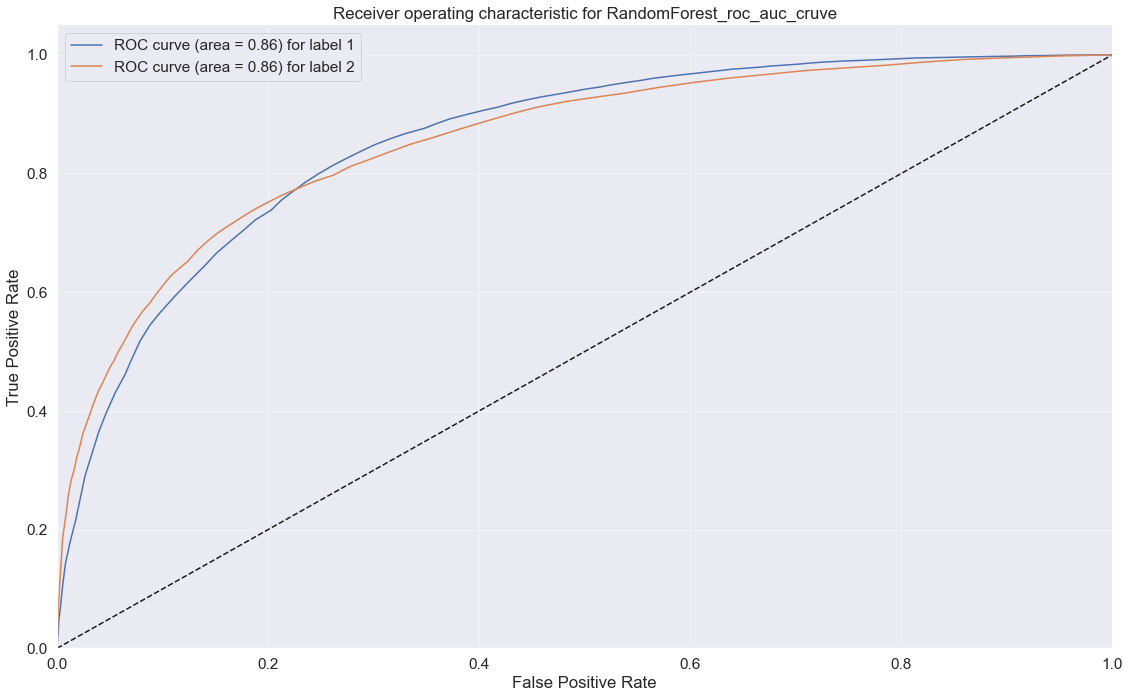

In [91]:
plot_multiclass_roc(RandomForestModel, test_inputs, test_target, 2, figsize=(16,10))

Using predict_proba method


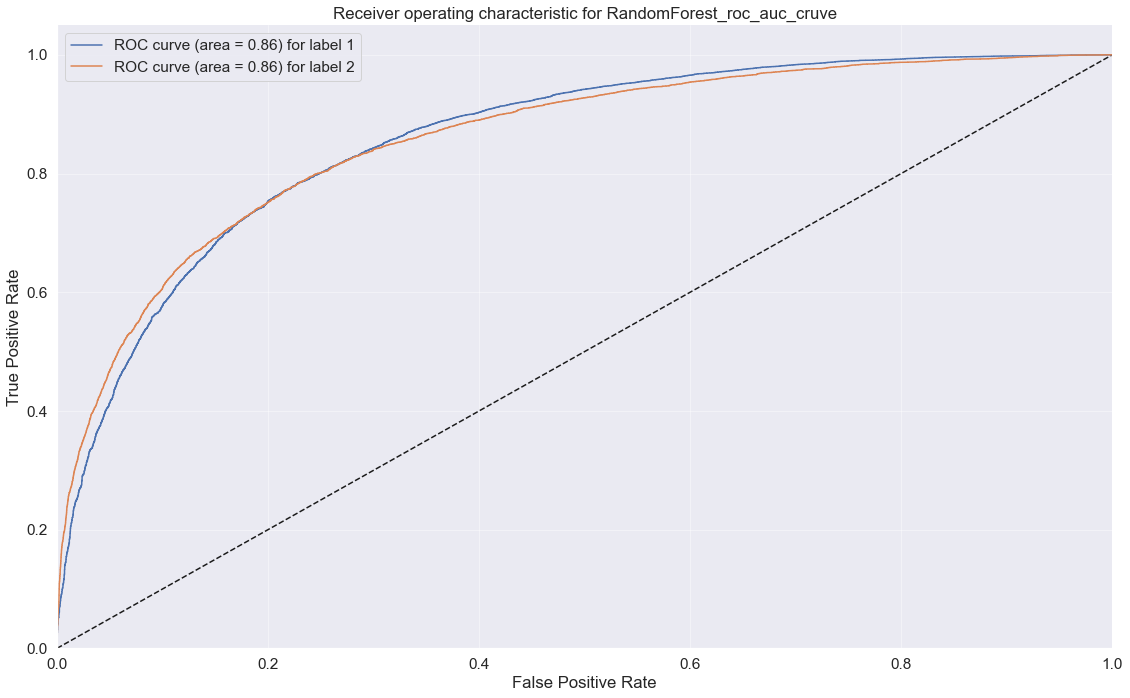

In [92]:
plot_multiclass_roc(RandomForestModel_optimized, test_inputs, test_target, 2, figsize=(16,10))

non-optimized RandomForestClassifier
Random Forest: f1=0.577 auc=0.690


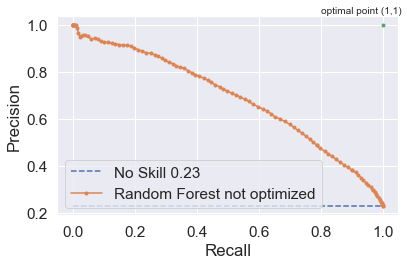

In [191]:
print("non-optimized RandomForestClassifier")
pre_recall_curve(RandomForestModel, test_inputs, test_target)

optimized RandomForestClassifier
Random Forest: f1=0.553 auc=0.689


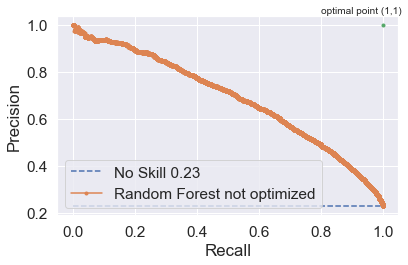

In [192]:
print("optimized RandomForestClassifier")
pre_recall_curve(RandomForestModel_optimized, test_inputs, test_target)

    For imbalanced datasets where the No class or the 0 class is greater than the Yes class or class 1, we can peorfm an analysis called a precision-recall curve. Key to the calculation of precision and recall is that the calculations do not make use of the true negatives. It is only concerned with the correct prediction of the minority class, class 1. A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve. A model with perfect skill is depicted as a point at (1,1). A skilful model is represented by a curve that bows towards (1,1) above the flat line of no skill. Both models seem to have similar Precison-recall curve and have close F1 and AUC scores. However, the unoptimized model is greater by a small margin; therefore if we are to use this metric to determine which model is better, it would be the unoptimized, base Random Forest model



# Conclusion

Looking at the test dataset metrics, in conclusion since the base model performed better in the accuracy score, classification report, had a more favorable result for the confusion matrix, and perfromed just as well in the ROC curve and AUC score test compared to the optimized model, I would say `the base model` (**RandomForestModel**) `is the best model to use`